In [1]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.cv1 = nn.Conv2d(1, 6, 5)
        self.cv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.cv1(x)), 2)
        x = F.max_pool2d(F.relu(self.cv2(x)), 2)
        x = F.relu(self.fc1(x.view(-1, self.n_flat_features(x))))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def n_flat_features(self, x):
        prod = 1
        for x in x.size()[1:]:
            prod *= x
        return prod
net = Net()
for x in net.parameters(): print(x.size())

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([16, 6, 5, 5])
torch.Size([16])
torch.Size([120, 400])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])


In [3]:
input = torch.randn(200, 1, 32, 32)
output = net.forward(input)
print(output)

tensor([[ 3.9857e-02,  4.7675e-02,  1.9586e-03,  ..., -1.1642e-02,
         -2.5260e-02,  1.6497e-02],
        [ 5.4945e-02,  5.3920e-02,  2.2520e-03,  ..., -6.8844e-03,
         -3.0182e-02,  2.2082e-02],
        [ 3.2575e-02,  5.4268e-02, -1.5180e-02,  ...,  5.0856e-04,
          1.3408e-03,  2.2641e-02],
        ...,
        [ 4.5619e-02,  5.0114e-02, -1.3092e-02,  ..., -8.0832e-03,
         -2.2459e-02,  2.0992e-02],
        [ 3.7333e-02,  4.2547e-02,  1.2017e-02,  ..., -7.8882e-03,
         -1.0957e-02, -1.0265e-02],
        [ 5.8338e-02,  4.1804e-02,  7.6650e-03,  ...,  1.8733e-03,
         -1.1170e-02,  7.2218e-05]], grad_fn=<AddmmBackward>)


In [4]:
target = torch.randint(0, 9, (output.size()[0], ))
criterion = nn.CrossEntropyLoss()
loss = criterion(output, target)
print(loss)

tensor(2.3005, grad_fn=<NllLossBackward>)


In [23]:
loss_history = []
for i in range(100):
    output = net.forward(input)
    optimizer = optim.Adam(net.parameters(), lr=0.0001, weight_decay=0.95)
    optimizer.zero_grad()
    loss = criterion(output, target)
    loss.backward(retain_graph=True)
    optimizer.step()
    loss_history.append(loss.data.item())
    if i%20==0: print(loss.data.item())

2.1859683990478516
2.185974597930908
2.1859936714172363
2.186027765274048
2.1860697269439697


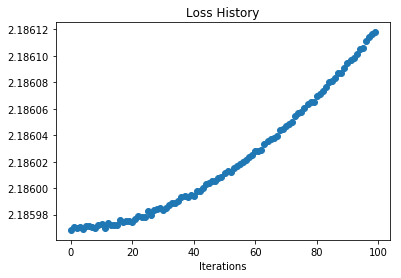

In [24]:
plt.title('Loss History')
plt.plot(loss_history, 'o')
plt.xlabel('Iterations')
plt.show()

In [130]:
import pickle
import os
folder = 'mnist_dataset'
files = os.listdir(folder)
for file in files:
    if file.endswith('ubyte'):
        path = os.path.join(folder, file)
#         print(path)
        with open(path, 'rb') as f:
            print(fa[:4])
# with open('')

NameError: name 'fa' is not defined

In [2]:
import os,codecs,numpy

# PROVIDE YOUR DIRECTORY WITH THE EXTRACTED FILES HERE
datapath = 'mnist_dataset/'

files = os.listdir(datapath)

def get_int(b):   # CONVERTS 4 BYTES TO A INT
    return int(codecs.encode(b, 'hex'), 16)

data_dict = {}
for file in files:
    if file.endswith('ubyte'):  # FOR ALL 'ubyte' FILES
        print('Reading ',file)
        with open (datapath+file,'rb') as f:
            data = f.read()
            type = get_int(data[:4])   # 0-3: THE MAGIC NUMBER TO WHETHER IMAGE OR LABEL
            length = get_int(data[4:8])  # 4-7: LENGTH OF THE ARRAY  (DIMENSION 0)
            if (type == 2051):
                category = 'images'
                num_rows = get_int(data[8:12])  # NUMBER OF ROWS  (DIMENSION 1)
                num_cols = get_int(data[12:16])  # NUMBER OF COLUMNS  (DIMENSION 2)
                parsed = numpy.frombuffer(data,dtype = numpy.uint8, offset = 16)  # READ THE PIXEL VALUES AS INTEGERS
                parsed = parsed.reshape(length,num_rows,num_cols)  # RESHAPE THE ARRAY AS [NO_OF_SAMPLES x HEIGHT x WIDTH]           
            elif(type == 2049):
                category = 'labels'
                parsed = numpy.frombuffer(data, dtype=numpy.uint8, offset=8) # READ THE LABEL VALUES AS INTEGERS
                parsed = parsed.reshape(length)  # RESHAPE THE ARRAY AS [NO_OF_SAMPLES]                           
            if (length==10000):
                set = 'test'
            elif (length==60000):
                set = 'train'
            data_dict[set+'_'+category] = parsed

Reading  t10k-images.idx3-ubyte
Reading  t10k-labels.idx1-ubyte
Reading  train-images.idx3-ubyte
Reading  train-labels.idx1-ubyte


(-0.5, 27.5, 27.5, -0.5)

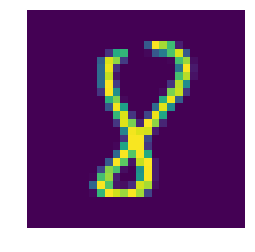

In [3]:
# print(data_dict['train_labels'])
plt.imshow(data_dict['train_images'][858])
plt.axis('off')

In [72]:
num_train = 1000
num_val = 1000
X_train = torch.tensor(np.expand_dims(data_dict['train_images'], axis=1))[:num_train].type('torch.FloatTensor')
y_train = torch.tensor(data_dict['train_labels'])[:num_train].type('torch.LongTensor')
X_val = torch.tensor(np.expand_dims(data_dict['train_images'], axis=1))[num_train:num_train+num_val].type('torch.FloatTensor')
y_val = torch.tensor(data_dict['train_labels'])[num_train:num_train+num_val].type('torch.FloatTensor')
X_test = torch.tensor(np.expand_dims(data_dict['test_images'], axis=1)).type('torch.FloatTensor')
y_test = torch.tensor(data_dict['test_labels']).type('torch.FloatTensor')
print(X_train.size())
print(y_train.size())
print(X_val.size())
print(y_val.size())
print(X_test.size())
print(y_test.size())

torch.Size([1000, 1, 28, 28])
torch.Size([1000])
torch.Size([1000, 1, 28, 28])
torch.Size([1000])
torch.Size([10000, 1, 28, 28])
torch.Size([10000])


In [73]:
class Mynet(nn.Module):
    def __init__(self):
        super(Mynet, self).__init__()
        self.c1 = nn.Conv2d(1, 6, 5, padding=2)
        self.c2 = nn.Conv2d(6, 16, 5, padding=2)
        self.f1 = nn.Linear(16*7*7, 120)
        self.f2 = nn.Linear(120, 84)
        self.f3 = nn.Linear(84, 10)
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.c1(x)), 2)
        x = F.max_pool2d(F.relu(self.c2(x)), 2)
        x = x.view(x.size()[0],-1)
        x = F.relu(self.f1(x))
        x = F.relu(self.f2(x))
        x = self.f3(x)
        return x
mnist_nn = Mynet()
out = mnist_nn.forward(X_train)
print(out.size())

torch.Size([1000, 10])


In [74]:
criterion = nn.CrossEntropyLoss()
loss = criterion(out, y_train)
print(loss)

tensor(3.2824, grad_fn=<NllLossBackward>)


In [89]:
iterations = 100
print_every = 10
loss_history = []
for i in range(iterations):
    output = mnist_nn.forward(X_train)
    optimizer = optim.Adam(mnist_nn.parameters(), lr=0.01, weight_decay=0)
    optimizer.zero_grad()
    loss = criterion(output, y_train)
    loss.backward(retain_graph=True)
    optimizer.step()
    loss_history.append(loss.data.item())
    if i % print_every == 0: print(loss.data.item())

2.3016977310180664
3.46732759475708
1.807489275932312
1.2153007984161377
1.7071003913879395
0.5900753140449524
1.3131235837936401
0.45815861225128174
1.5178022384643555
0.41549089550971985


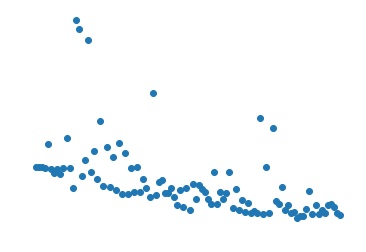

In [90]:
plt.plot(loss_history,'o')
plt.axis('off')
plt.show()

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [16]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.MNIST(root='mnist_dataset', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='mnist_dataset', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

RuntimeError: Dataset not found. You can use download=True to download it

In [2]:
import numpy as np
import torch.nn as nn

In [ ]:
class net(nn.Module()):
    